In [30]:
# Import libs
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import numpy
from tensorflow import keras
import pandas as pd

In [31]:
# Load dataset from Keras package
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

<function matplotlib.pyplot.show(*args, **kw)>

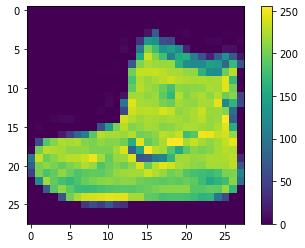

In [32]:
# Using pyplot to see/show one of the element in train_images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

In [33]:
# Preprocessing dataset
# Make the scale range from 0-1 by dividing everything in the array matrix with 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0

In [34]:
# Model generation
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax)])


In [35]:
# Training the model
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4952 - accuracy: 0.8278
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3159 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8911


In [36]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8584
0.8583999872207642


In [37]:
predictions = model.predict(test_images)
predictions[0]

array([9.7327147e-06, 3.4838206e-07, 3.4386252e-07, 1.6043029e-07,
       5.8849969e-07, 8.1363600e-03, 2.2513217e-05, 2.3789950e-02,
       9.1017500e-06, 9.6803087e-01], dtype=float32)

In [38]:
numpy.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

In [60]:
air_max = imread('./img/nike-air-max.jpg')
air_max = air_max / 255.0
air_max = air_max.reshape(1,28,28)

In [61]:
result = model.predict(air_max)
numpy.argmax(result[0])
# model does not recognise an airmax?

8